# Análise de dados da Copa do Mundo FIFA o longo do tempo

 Projeto acadêmico do curso de Ciências de Dados e Análise de Comportamento, da disciplina Imersão Profissional: Visualização de Dados, focado no tratamento de dados, identificação de tendências históricas e análise de desempenho de jogadores. 

 O conjunto de dados dessa atividade está disponível em: [FIFA World Cup](https://www.kaggle.com/datasets/abecklas/fifa-world-cup/data) no Kaggle. 
 
 **Este dataset é composto por três principais arquivos:** 
 - WorldCupMatches: Inclui detalhes de todas as partidas das Copas do Mundo, como resultados, gols, fases do torneio, locais e dados de público. Permite explorar padrões em jogos e a evolução dos gols. 
 - Jogadores Da Copa DoMundo (WorldCupPlayers): Contém dados sobre os jogadores que participaram das Copas do Mundo, suas atuações, gols e cartões, ajudando a analisar o desempenho individual e destacar os principais jogadores. 
 - Copas do Mundo (WorldCups): Fornece um resumo de todas as edições da Copa do Mundo, com informações sobre país-sede, vencedores, gols totais e público, essencial para entender a evolução e marcos do torneio

## Objetivos:
- Verificar a evolução do público nos estádios.
- Identificar tendências no número de cartões amarelos e vermelhos.
- Explorar dados sobre jogadores e times.
- Analisar o número de gols marcados ao longo das Copas do Mundo.
- Analisar a ofensividade das seleções

In [54]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [55]:
# Lendo os datasets
wc_jogos = pd.read_csv("../Datasets/WorldCupMatches.csv")
wc_players = pd.read_csv("../Datasets/WorldCupPlayers.csv")
wc = pd.read_csv("../Datasets/WorldCups.csv")

In [56]:
# Definindo estilos do gráficos do Seaborn
sns.set_theme(style='whitegrid', palette='viridis')

# **Análise Exploratória dos Datasets**

In [57]:
# Exibindo as 5 primeiras linhas do conjunto de dados
display(wc_jogos.head())
print("\n")
display(wc_players.head())
print("\n")
display(wc.head())

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [58]:
# Verificando a quantidade de linhas e colunas do conjunto de dados
print(f"Quantidade de linhas e colunas do conjunto de dados de jogos: {wc_jogos.shape}")
print(f"Quantidade de linhas e colunas do conjunto de dados de jogadores: {wc_players.shape}")
print(f"Quantidade de linhas e colunas do conjunto de dados de copas: {wc.shape}")


Quantidade de linhas e colunas do conjunto de dados de jogos: (4572, 20)
Quantidade de linhas e colunas do conjunto de dados de jogadores: (37784, 9)
Quantidade de linhas e colunas do conjunto de dados de copas: (20, 10)


In [59]:
# Mostrando informações sobre as colunas e os tiipos de dados dos 3 datasets
print("Dataset dos Jogos")
display(wc_jogos.info())
print("\n Dataset dos Jogadores")
display(wc_players.info())
print("\n Dataset das Copas")
display(wc.info())

Dataset dos Jogos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Ass

None


 Dataset dos Jogadores
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


None


 Dataset das Copas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


None

É muito importante começar sempre observando as informações do dataset de estudo, pois é aqui que temos uma visão geral do que estou lidando, se há valores nulos no dataset e o tipo de dados das colunas.

# Tratando os nulos do dataset dos jogos

In [60]:
# Verificando as colunas de wc_jogos que tem nulos 
wc_jogos.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

Podemos ver que há nulos em todas as colunas do dataset dos jogos da Copa do mundo.

In [61]:
# Verificando as 10 últimas linhas do dataset wc_jogos
wc_jogos.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note que observando o final do dataset, há muitas linhas completamente vazias que vão atrapalhar a análise.

In [62]:
# Eliminando as linhas que possuem todos os valores nulos
wc_jogos = wc_jogos.dropna(how='all')

Percebi que no final do dataset wc_jogos havia diversas linhas completamente vazias, por isso resolvi deletá-las. Usando `how='all'` dentro de dropna, me certifico que só será excluído apenas as linhas que esão totalmente vazias, sem perder nenhuma informação importante.

In [63]:
# Verificando nulos após o tratamento
wc_jogos.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

Aṕos o tratamento removendo as linhas sem informações, ainda temos dois valores nulos na coluna `Attendance`.

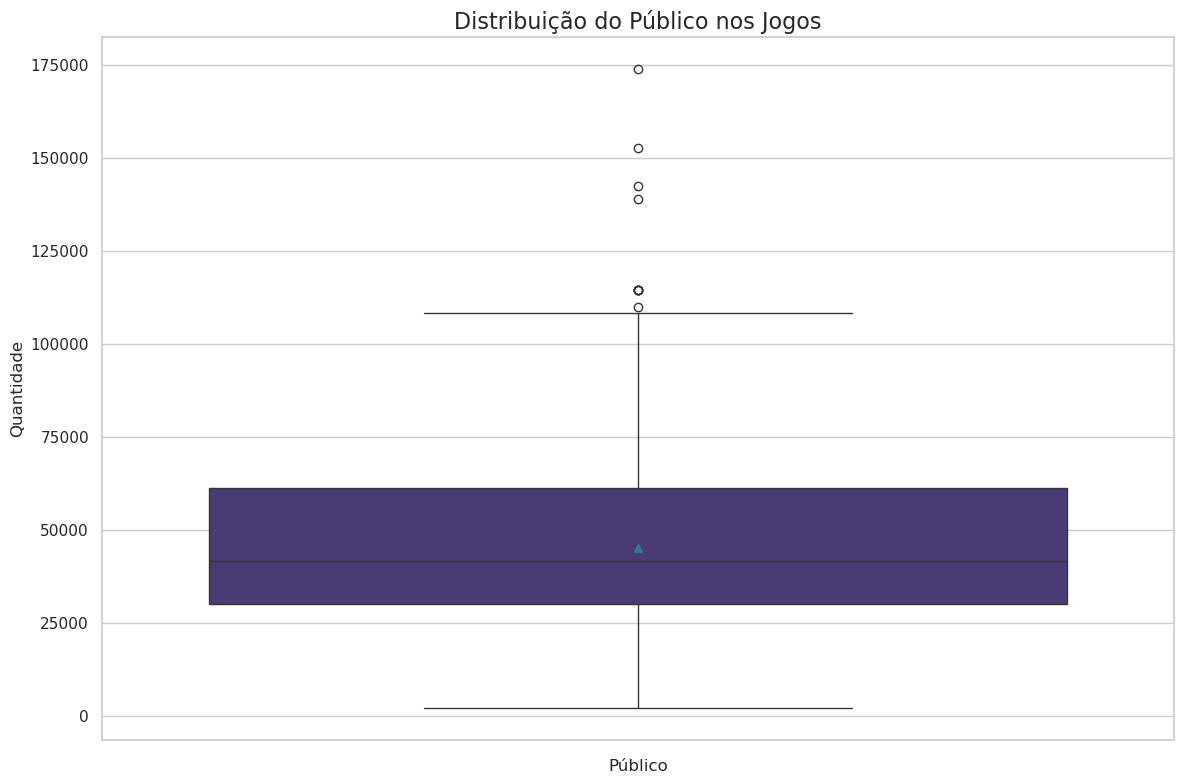

In [64]:
# Boxplot para verificar a distribuição do público
plt.figure(figsize=(12,8))
sns.boxplot(y='Attendance', data=wc_jogos, showmeans=True)
plt.title("Distribuição do Público nos Jogos", fontsize=16)
plt.xlabel("Público")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show();

Este boxplot nos ajuda a entender a distribuição dos valores na coluna Attendance. O foco é visualizar a mediana dessa coluna, que representa o valor central (50%) dos dados. Além disso, podemos observar que a média está acima da mediana, o que é compreensível, já que há diversos valores acima do limite máximo (outliers). Esses outliers elevam a média, pois ela é sensível a valores extremos. Essa informação será útil para tratar os dois valores nulos da coluna de forma eficiente.

In [65]:
# Veificando o valor da mediana e fazendo o tratamento dos nulos com a mediana
mediana_jogos = wc_jogos['Attendance'].median()
print(f"Mediana do público nos jogos: {mediana_jogos}")
wc_jogos['Attendance'] = wc_jogos['Attendance'].fillna(mediana_jogos)

Mediana do público nos jogos: 41579.5


Neste caso, para os valores nulos da coluna `Attendance`, optei por usar a mediana. O motivo foi porque a mediana é uma medida de tendência central mais robusta que a média e resistente a outliers.


In [66]:
# Coluna Attendance tratada
wc_jogos.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

O dataset wc_jogos foi devidamente tratado e não apresenta mais valores nulos.

# Tratando os nulos do dataset dos jogadores

In [67]:
# Verificando nulos do dataset wc_players
wc_players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

Podemos observar que no dataset wc_players, temos nulos em duas colunas, `Position` e `Event`.

In [68]:
# Descobrindo quais são os valores únicos das colunas que Position
wc_players["Position"].unique()

array(['GK', nan, 'C', 'GKC'], dtype=object)

Olhando os valores únicos da coluna Position, fica claro que não é possível preencher os valores nulos com bfill() ou ffill() porque a quantidade de valores únicos não é suficiente e isso geraria informações falsas.

In [69]:
# tratando coluna Position
wc_players["Position"] = wc_players["Position"].fillna("Desconhecido")

Após análise dos valores únicos, entendi que a melhor opção era criar uma nova informação para os valores nulos da coluna Position. Esse valor é 'Desconhecido', pois dessa forma conseguimos fazer o tratamento de maneira eficiente sem adicionar informações falsas.

In [70]:
# Descobrindo os valores únicos da coluna Event
wc_players["Event"].unique()

array([nan, "G40'", "G70'", ..., "I66' Y73'", "I91' G105'", "I105' G107'"],
      dtype=object)

A coluna Event possui um grande número de valores únicos, eles são bem variados, por isso, similar a coluna Position, preencher os nulos com bfill() ou ffill() não é a melhor opção, pois corremos o risco de adicionar informações erradas no dataset.

In [71]:
# Tratando coluna Event
wc_players["Event"] = wc_players["Event"].fillna("Evento Desconhecido")

Evitando informações falsas no dataset, foi criado a informação "Evento Desconhecido", dessa forma os nulos são tratados sem perder a integridade das informações.

In [72]:
# Carregando amostra aleatória para visualizar as mudanças
wc_players.sample(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
6992,514,1559,YUG,LOVRIC Ljubomir (YUG),S,6,Vladimir POPOVIC,Desconhecido,Evento Desconhecido
75,201,1093,YUG,SIMONOVIC Bosko (YUG),S,0,Momcilo DJOKIC,Desconhecido,Evento Desconhecido
21023,337,3067,CMR,MICHEL Henri (FRA),S,15,Hans AGBO,Desconhecido,Evento Desconhecido
8306,239,1676,HUN,BAROTI Lajos (HUN),S,3,Sandor MATRAI,Desconhecido,Evento Desconhecido
34513,255931,300186494,ECU,RUEDA Reinaldo (COL),N,19,SARITAMA,Desconhecido,Evento Desconhecido


In [73]:
# Verificando nulos após o tratamento
wc_players.isnull().sum()

RoundID          0
MatchID          0
Team Initials    0
Coach Name       0
Line-up          0
Shirt Number     0
Player Name      0
Position         0
Event            0
dtype: int64

Após o tratamento feito criando as informações **"Desconhecido"** e **"Evento Desconhecido"**, o dataset encontra-se livre de valores nulos.

# Checando se o dataset das copas tem valores nulos

In [74]:
# Verificando nulos do dataset wc
wc.isnull().sum().sum()

0

Não há necessidade de fazer nenhum tratamento de nulos. O dataset wc (World Cups) não possui valores nulos.

# Informação importante sobre o tratamento de nulos que realizei ⚠️

### Por que não usei `inplace=True` quando tratei os valores nulos?

Nas versões futuras do Pandas (a partir da versão 3.0), o uso de `inplace=True` pode causar comportamentos inesperados. Por isso, a funcionalidade será `removida`, e a recomendação é utilizar `atribuição direta` para garantir a compatibilidade e evitar problemas.

# **Analisando os Dados**

In [75]:
# Verficando o período de tempo dos dados da Copa do Mundo
display(wc['Year'].min())
display(wc['Year'].max())

1930

2014

Aqui podemos ver que os dados sobre a Copa do Mundo FIFA começa no ano de 1930 e temos dados até 2014.

In [76]:
# Juntando os datasets wc_jogos e wc_players
wcs_unidos = pd.merge(wc_jogos, wc_players, on='MatchID', how='left')
wcs_unidos.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Home Team Initials,Away Team Initials,RoundID_y,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,FRA,MEX,201,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,Evento Desconhecido
1,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,FRA,MEX,201,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,Evento Desconhecido


### Juntando os Datasets de Jogos e Jogadores

Neste trecho de código, estamos juntando os datasets de jogos (`wc_jogos`) e jogadores (`wc_players`) usando a coluna `MatchID` como chave comum. A junção será feita à esquerda (`left join`), o que significa que todas as linhas do dataset de jogos serão mantidas, e as informações do dataset de jogadores serão adicionadas onde houver correspondência na coluna `MatchID`.


In [77]:
# Dividindo os eventos em múltiplas linhas
dividir_event = wcs_unidos['Event'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True)
wcs_unidos = wcs_unidos.drop(columns=['Event']).join(dividir_event.rename('Event')).reset_index(drop=True)


Processando a Coluna `Event`
Objetivo:
- Separar eventos múltiplos (ex.: "G10' Y25'") em linhas individuais ("G10'" e "Y25'") para facilitar a contagem de gols, cartões, etc.

Como funciona:

Divide os eventos por espaços:
"G10' Y25'" → vira duas partes: "G10'" e "Y25'".

Cria uma linha para cada parte, replicando os outros dados do jogador.

**Remove** a coluna original e **junta** os eventos divididos.

# Analisando os gols, público, cartões e ofensividade das seleções 

### Gols

In [78]:
# Filtrando os eventos que começam com 'G'
gols = wcs_unidos[wcs_unidos['Event'].str.startswith('G')]

O objetivo desta célula é filtrar o DataFrame wcs_unidos para mostrar apenas os eventos relacionados a gols. Para isso, utilizamos o método `str.startswith('G')`, que verifica se os valores na coluna Event começam com a letra "G", indicando eventos de gol.

In [79]:
# Agrupando os gols por jogador, time e ano
gols_por_player= gols.groupby(['Player Name', 'Team Initials','Year'])['Event'].count().reset_index(name= 'Gols')
gols_por_player.head(3)

,Player Name,Team Initials,Year,Gols
0,A. AYEW,GHA,2014.0,2
1,A. DELGADO,ECU,2006.0,2
2,A. GUARDADO,MEX,2014.0,1


No trecho acima agrupei por `Player Name`, `Team Initials` e `Year`, contando os gols (gols_por_player).

In [80]:
# Ordenando os gols por jogador
gols_por_player.sort_values('Gols', ascending= False).head(6)

,Player Name,Team Initials,Year,Gols
678,Just FONTAINE,FRA,1958.0,13
1128,SCH�RRLE,GER,2014.0,12
1159,Sandor KOCSIS,HUN,1954.0,11
556,JAMES,COL,2014.0,11
422,Gerd MUELLER,FRG,1970.0,9
1048,RONALDO,BRA,2002.0,8


Ordenei os jogadores pelo número de gols (do maior para o menor), exibindo os 6 primeiros para garantir que o melhor brasileiro aparecesse.

Aqui é importante notar potenciais erros no dataset. Quando mostro os 6 maiores artilheiros, incluindo o brasileiro Ronaldo, pude notar a presença de James Rodríguez, jogador da seleção colombiana, que embora ganhou o prêmio de gol mais bonito da Copa de 2014, ele **não** é um dos artilheiros históricos do torneio.

Por isso aconselho checar no site da FIFA a informação dos artilheiros históricos.

### Público

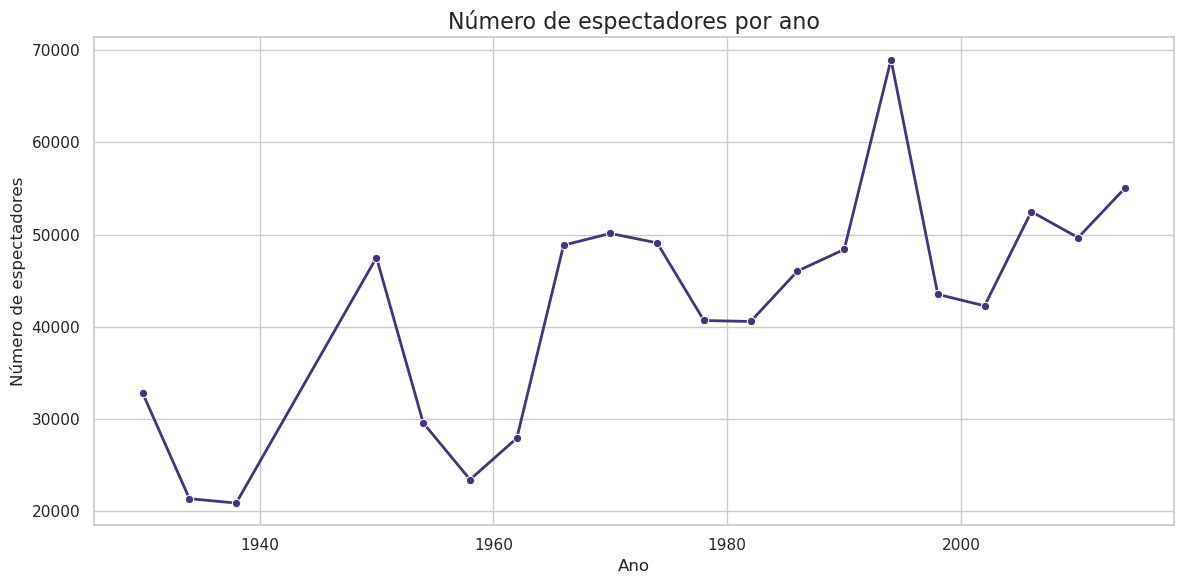

In [81]:
# Criando um gráfico de linhas para ver o número de espectadores por ano
plt.figure(figsize=(12, 6))
sns.lineplot(data=wc_jogos, x='Year', y='Attendance', marker='o', linewidth=2,errorbar=None)
plt.title('Número de espectadores por ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Número de espectadores')
plt.tight_layout()
plt.show();

Analisando o gráfico de linhas, pude perceber que o público variou muito ao longo dos anos. Vale a pena destacar os seguintes pontos:
- Declínio de espectadores entre 1930 e 1950. As tensões pós Primeira Guerra e pré Segunda Guerra provavlemente influenciaram muito para o número do público diminuir.
- Aumento de espectadores nos anos 1950. Após o fim da Segunda Guerra, as coisas finalmente pareciam estar entrando nos eixos e as pessoas podiam aproveitar a vida com certa normalidade apesar da Guerra Fria, resultando num pico no número de espectadores.
- Pico máximo dos anos 1990. Para alguns a era de ouro do futebol, tínhamos seleções incríveis como o Brasil de Romário, A Itália de Baggio e a França de Zidane. Além das grandes seleções, havia os grandes craques já mencionados, que provavelmente impulsionaram o aumento de público.

### Cartões Amarelos

In [82]:
# Filtrando os eventos que começam com 'Y'
amarelos = wcs_unidos[wcs_unidos['Event'].str.startswith('Y')]
amarelos.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Home Team Initials,Away Team Initials,RoundID_y,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
5659,1950.0,13 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,...,BRA,ESP,209,BRA,COSTA Flavio (BRA),S,0,BIGODE,Desconhecido,Y1'
11373,1962.0,30 May 1962 - 15:00,Group 4,Estadio El Teniente-Codelco,Rancagua,Argentina,1.0,0.0,Bulgaria,,...,ARG,BUL,231,ARG,LORENZO Juan Carlos (ARG),S,15,Ruben NAVARRO,C,Y1'
14109,1966.0,12 Jul 1966 - 19:30,Group 3,Goodison Park,Liverpool,Brazil,2.0,0.0,Bulgaria,,...,BRA,BUL,238,BUL,VYTLACIL Rudolf (TCH),S,6,Dobromir JECHEV,Desconhecido,Y1'
14110,1966.0,12 Jul 1966 - 19:30,Group 3,Goodison Park,Liverpool,Brazil,2.0,0.0,Bulgaria,,...,BRA,BUL,238,BRA,FEOLA Vicente (BRA),S,13,DENILSON,Desconhecido,Y1'
14122,1966.0,12 Jul 1966 - 19:30,Group 3,Goodison Park,Liverpool,Brazil,2.0,0.0,Bulgaria,,...,BRA,BUL,238,BUL,VYTLACIL Rudolf (TCH),S,11,Ivan KOLEV,Desconhecido,Y1'


Na célula acima, meu objetivo foi mostrar os eventos relacionados aos cartões amarelos (Y). Para isso utilizei o método `str.startswith('Y')`, que verifica os valores da coluna `Event` que começa com Y.

In [83]:
# Agrupando os cartões amarelos por ano
cartoes_por_ano = amarelos.groupby('Year').size().reset_index(name='Quantidade')
cartoes_por_ano.head()

,Year,Quantidade
0,1950.0,1
1,1962.0,1
2,1966.0,21
3,1970.0,51
4,1974.0,87


Usei o `groupby()`para agrupar e contar os cartões amarelos por ano antes de criar o gráfico para melhor visualização da informação.

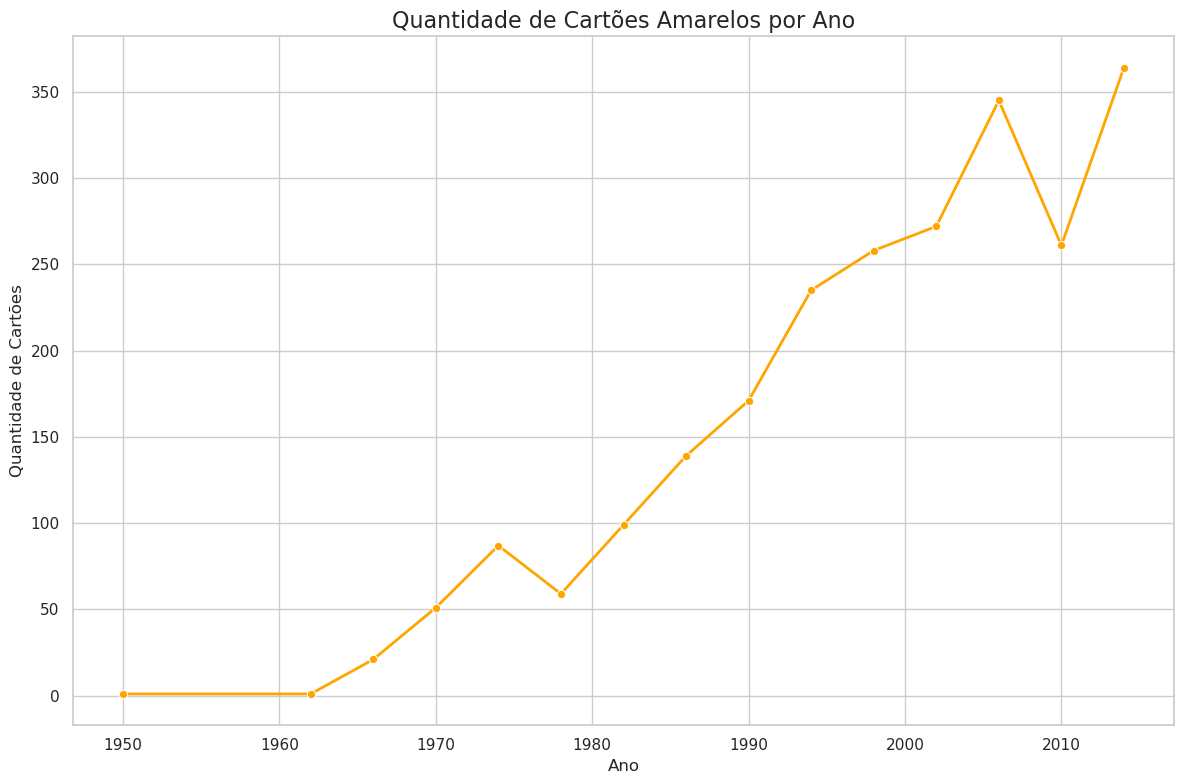

In [84]:
# Criando um gráfico de linhas para ver o número de cartões amarelos por ano
plt.figure(figsize=(12,8))
sns.lineplot(data=cartoes_por_ano, x='Year', y='Quantidade', marker='o', color='orange', linewidth=2)
plt.title('Quantidade de Cartões Amarelos por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Cartões')
plt.tight_layout()
plt.show();


O gráfico mostra um aumento gradual no número de cartões amarelos no fim dos anos 1970, até a Copa de 2006. O motivo para isso, principalmente no século XX pode estar relacionado a criação de regras mais rígidas para punir faltas violentas. 

O pico de amarelos aconteceu em 2014, para isso podemos pensar em como o futebol de hoje é mais rápido, o que também pode ocasionar faltas violentas e até mesmo árbritos mais rigorosos.

### Cartões vermelhos

In [85]:
# Filtrando os eventos que começam com 'R'
vermelhos = wcs_unidos[wcs_unidos['Event'].str.startswith('R')]

Na célula acima, meu objetivo foi mostrar os eventos relacionados aos cartões vermelhos (R). Para isso utilizei o método `str.startswith('R')`, que verifica os valores da coluna `Event` que começa com R.

In [86]:
# Agrupando os cartões vermelhos por ano
red_por_ano = vermelhos.groupby('Year').size().reset_index(name='Quantidade')
red_por_ano.head()

,Year,Quantidade
0,1930.0,1
1,1934.0,1
2,1938.0,4
3,1954.0,3
4,1958.0,3


Usei o `groupby()`para agrupar e contar os cartões vermelhos por ano, usando os dados para plotar um gráfico de linha.

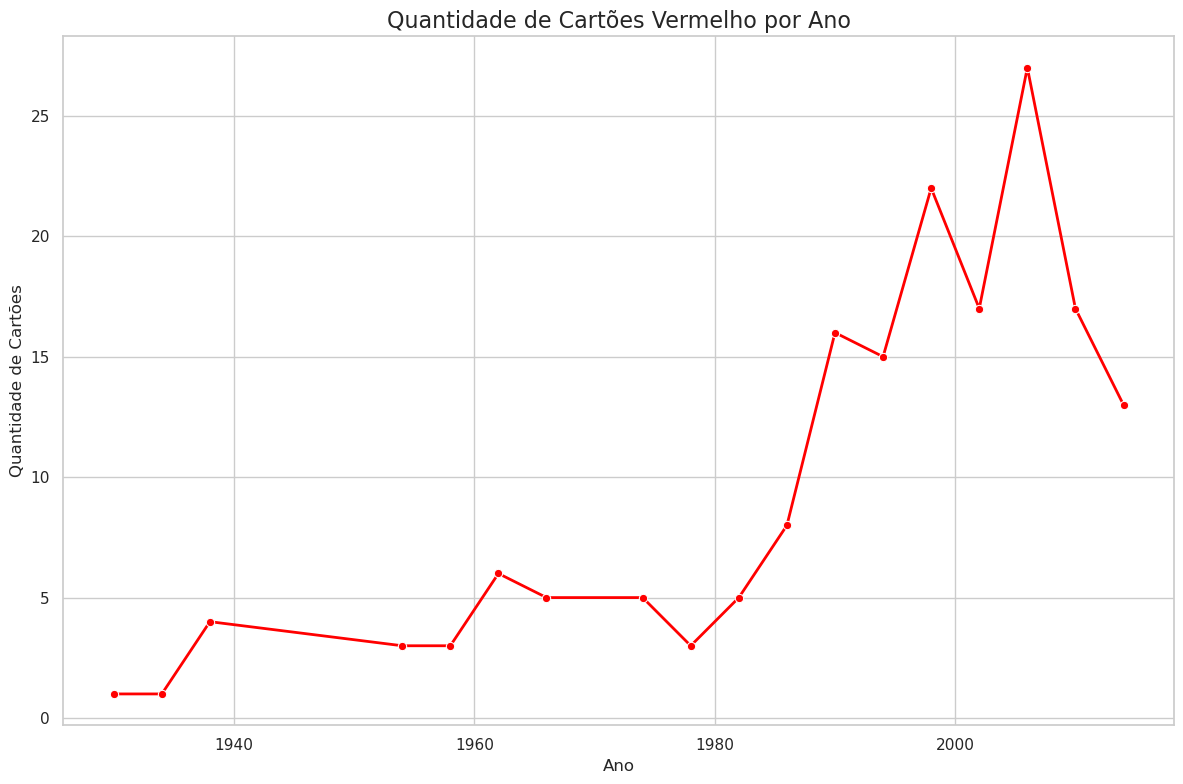

In [87]:
# Plotando um gráfico de linhas para ver o número de cartões vermelhos por ano
plt.figure(figsize=(12,8))
sns.lineplot(data=red_por_ano, x='Year', y='Quantidade', marker='o', color='red', linewidth=2)
plt.title('Quantidade de Cartões Vermelho por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Cartões')
plt.tight_layout()
plt.show();


O que me chamou atenção no número de cartões por ano neste gráfico é o pico em 2006, ano em que tivemos a famosa cabeçada de Zidane na final que resultou em sua expulsão e derrota da França. E também notei a diminuição de vermelhos após isso. A medida que o futebol evolui e fica cada vez mais tático, é importante manter todos os jogadores em campo para conseguir a vitória, provavelmente influenciando no declínio do número de vermelhos nas Copas seguintes

### Seleções mais ofensivas

In [88]:
# Criando uma nova coluna com o total de gols
wc_jogos['Total Goals']= wc_jogos['Home Team Goals'] + wc_jogos['Away Team Goals']

In [89]:
# Agrupando o total de gols por ano
gols_por_ano = wc_jogos.groupby('Year')['Total Goals'].sum().reset_index()
gols_por_ano.head()

,Year,Total Goals
0,1930.0,70.0
1,1934.0,70.0
2,1938.0,84.0
3,1950.0,88.0
4,1954.0,140.0


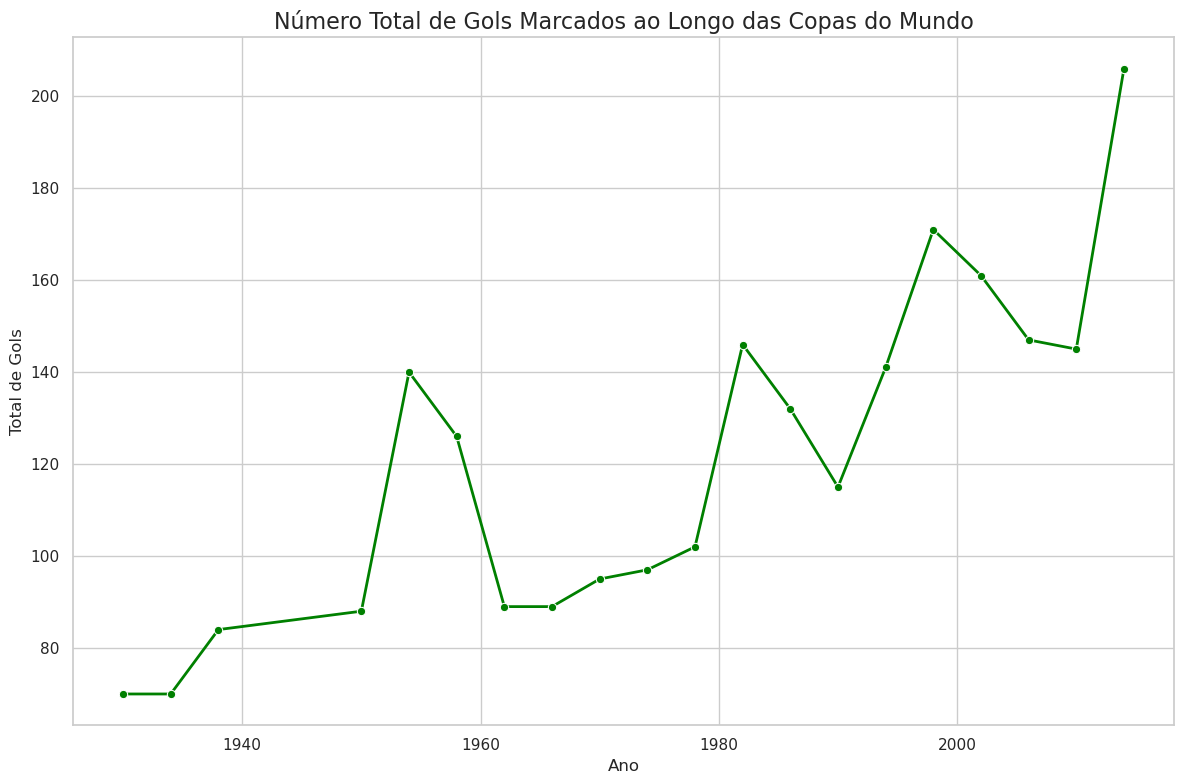

In [118]:
# Plotando um gráfico de linhas para ver o número total de gols por ano
plt.figure(figsize=(12,8))
sns.lineplot(data=gols_por_ano, x='Year', y='Total Goals', marker='o', linewidth=2,color='green')
plt.title('Número Total de Gols Marcados ao Longo das Copas do Mundo', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Total de Gols')
plt.tight_layout()
plt.show();

Nas últimas células desse notebook eu comecei o processo de conseguir o total de gols para plotar o gráfico de linhas.

Primeiro eu criei uma coluna nova chamada `Total Goals`onde somei os gols marcados fora e dentro de casa.

Depois agrupei o total de gol por ano e fiz a contagem. 

Por último plotei o gráfico que mostra a quantidade de gols por ano

Neste gráfico podemos ver que aṕos 2010 e a quantidade de gols deu um salto, atingindo o auge, isso pode ser motivos de táticas mais avançadas e treinamentos mais intensos e inovadores que buscam melhorar a performance dos atletas.

Também foi nesta copa que o Brasil foi derrotado por 7x1 numa partida contra a Alemanha, o que pode ter inflado os números de gols dessa Copa, fazendo os números atingirem este pico.

### Ofensividade das Seleções

In [94]:
# Agrupando os gols por seleção e renomeando as colunas corretamente
gols_por_selecao = wc_jogos.groupby('Home Team Name')['Total Goals'].sum().reset_index()

# Renomeando as colunas para algo mais descritivo
gols_por_selecao.rename(columns={'Home Team Name': 'Equipe', 'Total Goals': 'Gols'}, inplace=True)

# Ordenando as seleções pelo número de gols e exibindo as 5 mais ofensivas
gols_por_selecao= gols_por_selecao.sort_values('Gols', ascending=False)

gols_por_selecao.head()

,Equipe,Gols
7,Brazil,258.0
2,Argentina,155.0
35,Italy,140.0
26,Germany FR,135.0
25,Germany,101.0


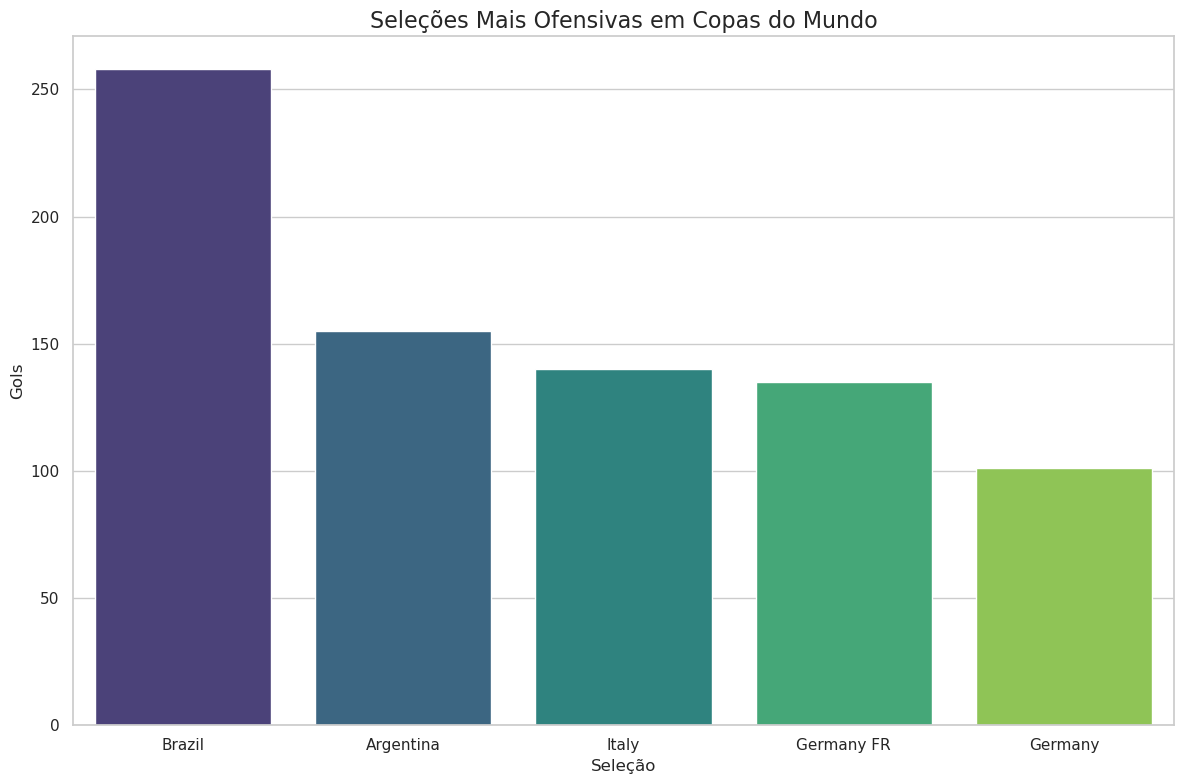

In [102]:
# Gráfico de barras mostrando as seleções mais ofensivas
plt.figure(figsize=(12,8))
sns.barplot(data=gols_por_selecao.head(),x='Equipe', y='Gols',hue='Equipe',palette='viridis')
plt.title('Seleções Mais Ofensivas em Copas do Mundo', fontsize=16)
plt.ylabel('Gols')
plt.xlabel('Seleção')
plt.tight_layout()
plt.show();

Primeiro, agrupei as seleções pelo nome (Home Team Name) e calculei o total de gols marcados por cada uma.
Depois, usei o método `rename()` e passei um dicionário para alterar os nomes das colunas, tornando-as mais descritivas e melhorando a visualização.
Por fim, ordenei os gols em ordem decrescente para identificar as seleções mais ofensivas, ou seja, aquelas que marcaram mais gols.

#### As seleções mais ofensivas são:
- Brasil com 258 gols
- Argentina com 155 gols
- Itália com 140 gols
- Alemanha Ocidental (*Germany FR*) com 135 gols
- Alemanha com 101 gols

Repare que temos duas Alemanhas na lista. A Alemanha Ocidental era como se chamava a parte ocidental da Alemanha durante a divisão do país na Guerra Fria. Essa divisão existiu até 1990, quando, com o fim da Guerra Fria, as duas Alemanhas se reunificaram, formando a atual Alemanha.

### Gols Jogando em casa 

In [ ]:
# Mostrandos quais são as seleções que mais fizeram gols dentro de casa
gols_casa = wc_jogos.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()

# Odernando as seleções pelo número de gols feitos em casa
gols_casa = gols_casa.sort_values('Home Team Goals', ascending=False)

gols_casa.head()

,Home Team Name,Home Team Goals
7,Brazil,180.0
2,Argentina,111.0
26,Germany FR,99.0
35,Italy,99.0
31,Hungary,73.0


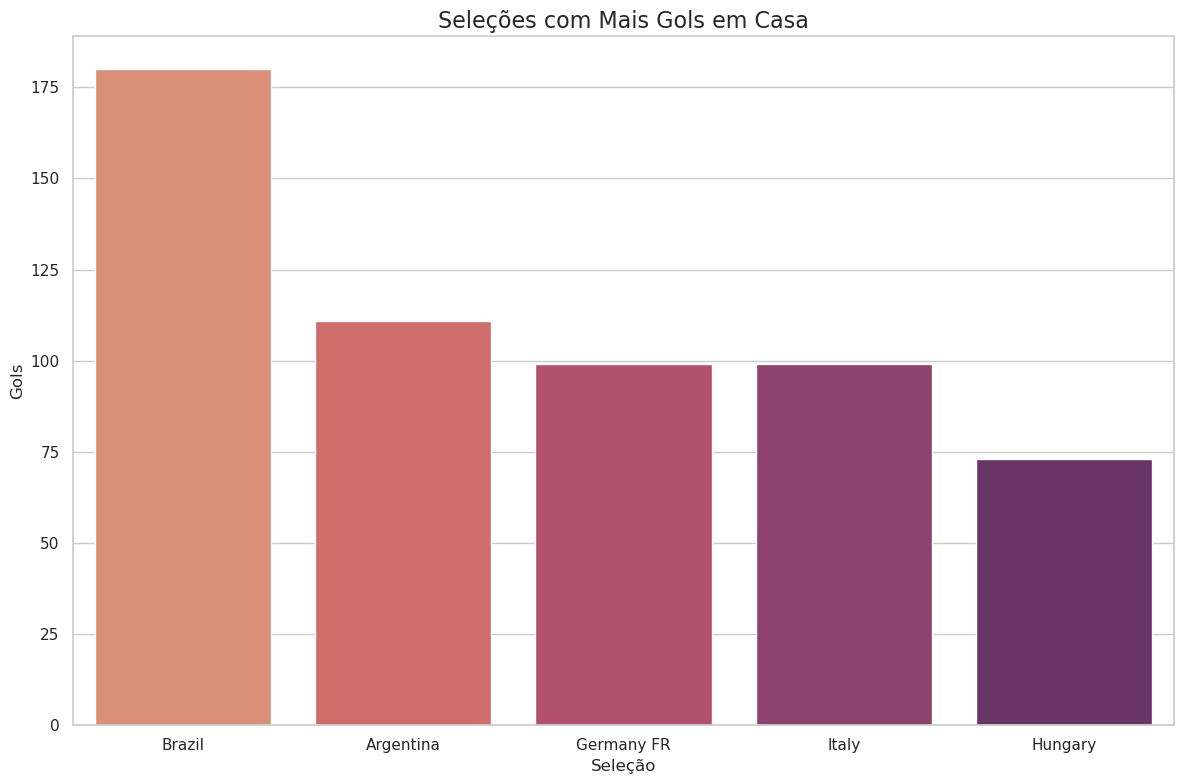

In [117]:
# Gráfico de barras mostrando as seleções com mais gols em casa
plt.figure(figsize=(12,8))
sns.barplot(data=gols_casa.head(),x='Home Team Name', y='Home Team Goals',hue='Home Team Name',palette='flare')
plt.title('Seleções com Mais Gols em Casa', fontsize=16)
plt.ylabel('Gols')
plt.xlabel('Seleção')
plt.tight_layout()
plt.show();

Depois de agrupar as seleções que fizeram mais gols em casa e agrupá-las para mostrar as equipes que mais fizeram gols dentro de casa, tive o seguinte resultado:
- Brasil com 180
- Argentina com 111
- Alemanha Ocidental com 99
- Itália com 99 
- Hungria com 73

A grande surpresa foi a Hungria, que embora não esteja no top 5 de seleções mais ofensivas, é a 5ª seleção que mais fez gols em casa.


### Gols jogando fora de casa

In [110]:
# Mostrandos quais são as seleções que mais fizeram gols Fora de casa
gols_fora = wc_jogos.groupby('Home Team Name')['Away Team Goals'].sum().reset_index()

# Ordenando as seleções pelos gols feitos fora de casa
gols_fora = gols_fora.sort_values('Away Team Goals', ascending=False)
gols_fora.head(5)

,Home Team Name,Away Team Goals
7,Brazil,78.0
2,Argentina,44.0
35,Italy,41.0
26,Germany FR,36.0
25,Germany,32.0


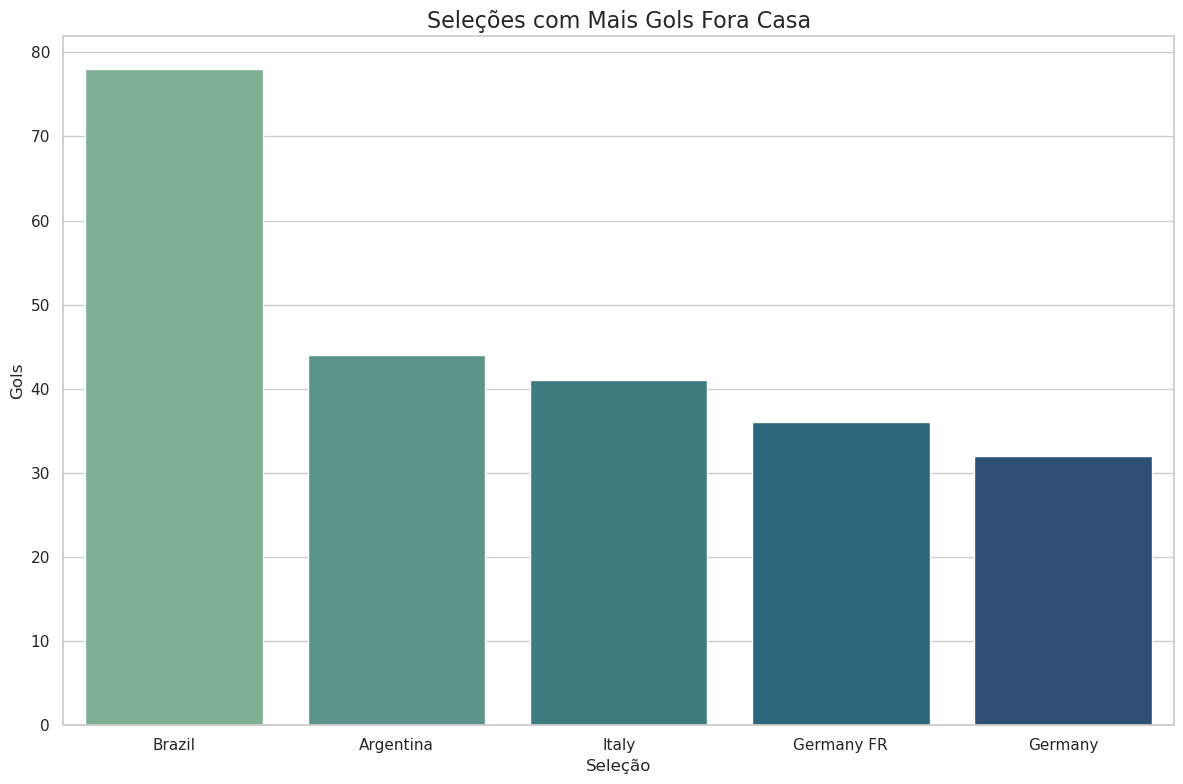

In [116]:
# Gráfico de barras mostrando as seleções com mais gols em casa
plt.figure(figsize=(12,8))
sns.barplot(data=gols_fora.head(),x='Home Team Name', y='Away Team Goals',hue='Home Team Name',palette='crest')
plt.title('Seleções com Mais Gols Fora Casa', fontsize=16)
plt.ylabel('Gols')
plt.xlabel('Seleção')
plt.tight_layout()
plt.show();

Depois de agrupar as seleções que fizeram mais gols em casa e agrupá-las para mostrar as equipes que mais fizeram gols fora de casa, tive o seguinte resultado:
- Brasil com 78
- Argentina com 44
- Itália com 41
- Alemanha Ocidental com 36
- Alemanha com 32

Mais uma vez o Brasil lidera o ranking, dessa vez quando analisamos os gols fora de casa. Mais uma amostra clara do porquê a seleção Brasileira é o melhor ataque das copas do mundo. Ter participado de todas elas também explica a seleção estar no topo em todos os quesitos ofensivos.

# **Conclusão**

- **Evolução dos gols:** O número de gols ao longo da história do torneio apresentou diversas oscilações, atingindo um pico notável em 1950 e um declínio considerável aṕos a Copa do Mundo de 1998. Porém o número de gols marcados atingiu a maior marca na copa de 2014, último ano de copa presente no dataset.
- **Público nos estádios:** Podemos observar uma grande variação da quantidade de espectadores aos longos dos
anos, com uma baixa na época pré segunda guerra mundial e chegando ao seu auge nos
anos 1990, época com diversos craques que influenciaram as pessoas a assistirem mais
futebol. Tempo marcado por grandes seleções como o Brasil, a França e a Itália, além do processo de modernização do futebol.
- **Distribuição de cartões:** Ao observar os gráficos podemos ver que o número de cartões amarelos teve uma crescente
que durou muitos anos, tendo seu auge em 2014 na Copa do Mundo do Brasil. Enquanto os
amarelos teve um aumento durante vários anos, os cartões vermelhos apresentaram altos e
baixos ao longo dos anos, com seu auge no fim dos anos 90. Porém diferentemente dos
cartões amarelos, os vermelhos apresentaram queda após a copa de 2006.
- **Times mais ofensivos:**  Brasil, Argentina, Itália e Alemanha dominam em gols marcados, reforçando sua tradição no futebol mundial.
- **Mais gols fora e dentro de casa:** Brasil se destaca em ambas estatísticas, mostrando o porquê é o maior ganhador da competição.

### Detalhes importantes a ser considerados: 

Quando analisamos os artilheiros, observamos que há possíveis erros neste dataset, já que entre os artilheiros temos o colombiano James Rodríguez, que apesar de ter ganho o prêmio de gol mais bonito na Copa de 2014, não é um dos artilheiros da competição. Então é importante ficar atentos aos outliers.
